<h1 align=center><font size = 5>Meeting in Clas 23 - Time Series and Forecasting with Python</font></h1>

## Forecasting with Python - Part 1

###1. Importing dependencies

> Kita akan meng import software library yang diperlukan untuk sesi ini

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

###2. Uploading the data into Jupyter notebook

>Kita akan meng upload file AirPassengers.csv dari cloud kedalam Jupyter notebook di google colabs ini

In [ ]:
data=pd.read_csv('/content/AirPassengers.csv')
data.shape

(144, 2)

###3. Data Exploration

>Kita akan berusaha memahami dan memperoleh pengetahuan lebih banyak tentang data yang kita upload

In [ ]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.tail() #memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
data.columns #memperlihatkan nama kolom dari sebuah pandas dataframe

Index(['#Passengers'], dtype='object')

In [ ]:
data.info #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<bound method DataFrame.info of             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]>

In [ ]:
data.dtypes #memperlihatkan data type untuk tiap field yang ada

#Passengers    int64
dtype: object

In [ ]:
data.describe() #describe() adalah sebuah metode dalam pandas dataframe yang digunakan untuk melakukan kalkulasi dari data statistic seperti percentile, mean, std, min, max dari serangkaian nilai numerik dari sebuah series atau dataframe

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


###4. Data Analysis

>Kita akan menganalisa data yang ada dan mengecek stasioner atau tidak

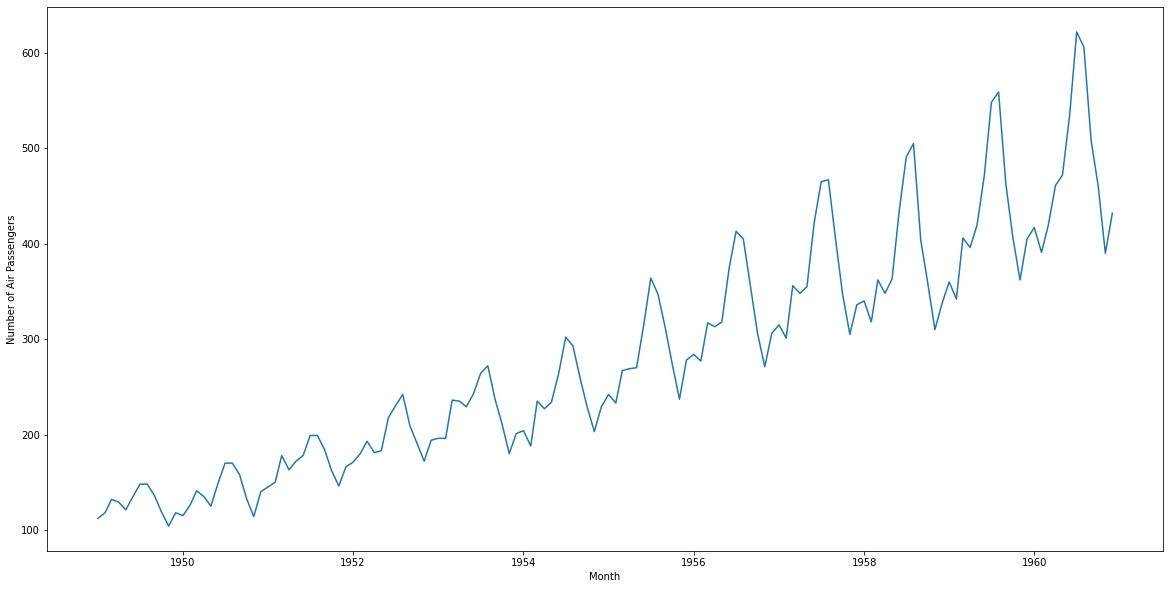

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

>Dari grafik ini kita melihat bahwa pola pertambahan jumlah penumpang memiliki efek seasonal, siklikal dan tren yang menaik dari 1950 ke 1960

####Stationarity Check - Rolling Statistic test

In [ ]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


>disini kita melakukan rolling terhadap rata-rata dan standar deviasi untuk mengecek apakah series ini stasioner atau tidak

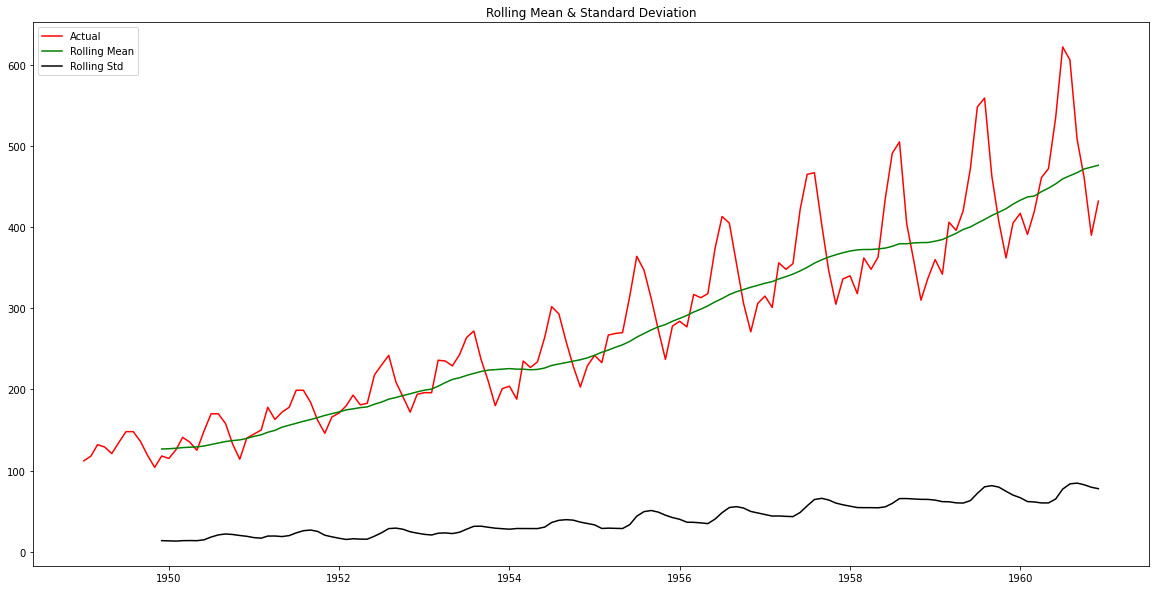

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

>pada grafik diatas kita melihat bahwa data actual dan rolling (mean dan std) cukup berbeda, menandakan bahwa series ini tidak stasioner.

####Stationarity Check - Augmented Dickey-Fuller (ADF) test

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


>Nilai ADF statistic yang jauh lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, kita gagal menolak null hypothesis pada 90%, 95%, and 99% confidence, yang berarti bahwa data time series ini strongly non-stationary. 

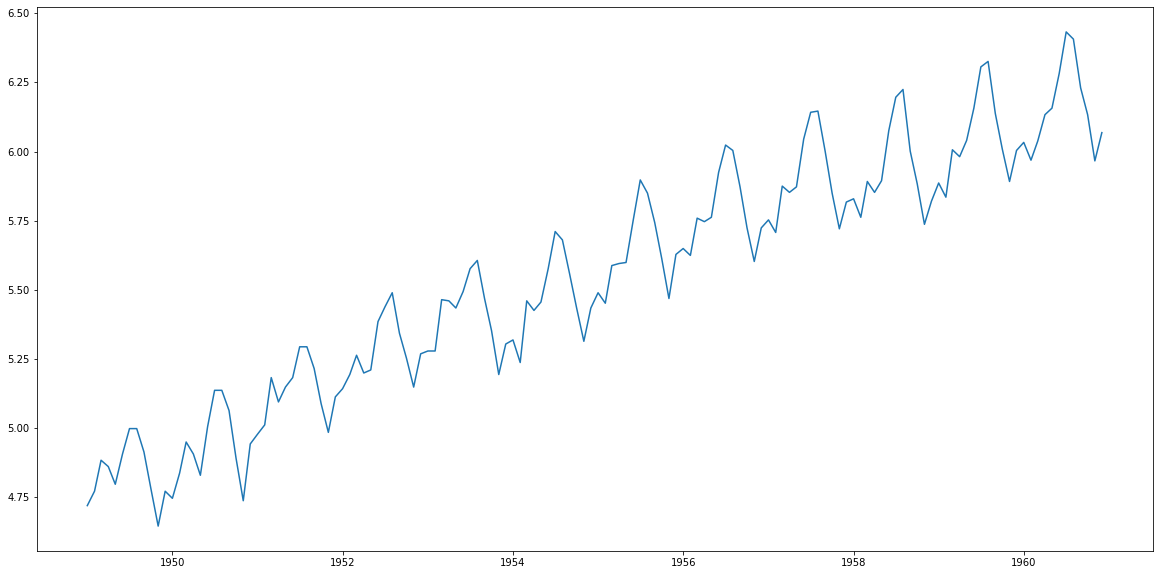

In [ ]:
plt.figure(figsize=(20,10))
data_log=np.log(data) #kita melakukan log analysis untuk men stabilkan variance dari sebuah series. 
plt.plot(data_log)

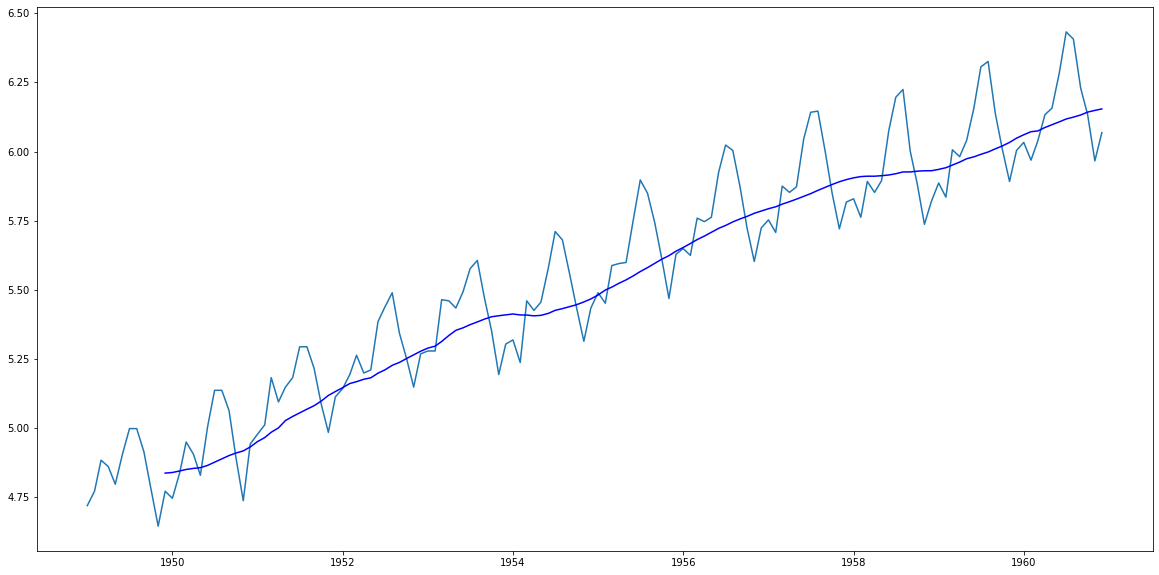

In [ ]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean() #disini kita melakukan rolling mean untuk melihat secara visual apakah series ini stationary atau tidak
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')

In [ ]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

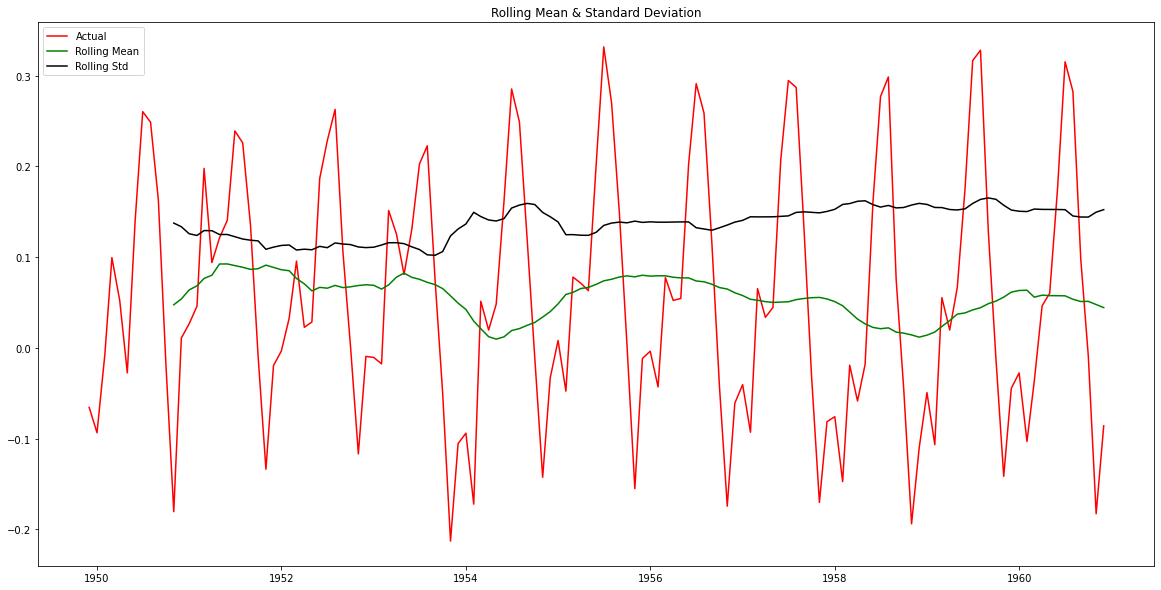

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [ ]:
stationarity(data_log_diff)

Dalam Dickey-Fuller test ini karena t-value (-3.162908) > DF critical value 1% (-3.486535) maka kita menerima null hypothesis yang menyatakan bahwa series ini tidak stasioner pd tingkat keyakinan 1%. Untuk tingkat keyakinan 5% dan 10% sudah menunjukkan series ini stasioner. p-value 0.022235 yg < 0.05 menunjukkan bahwa kita menolak null hypothesis, dan menyatakan bahwa series ini stasioner.

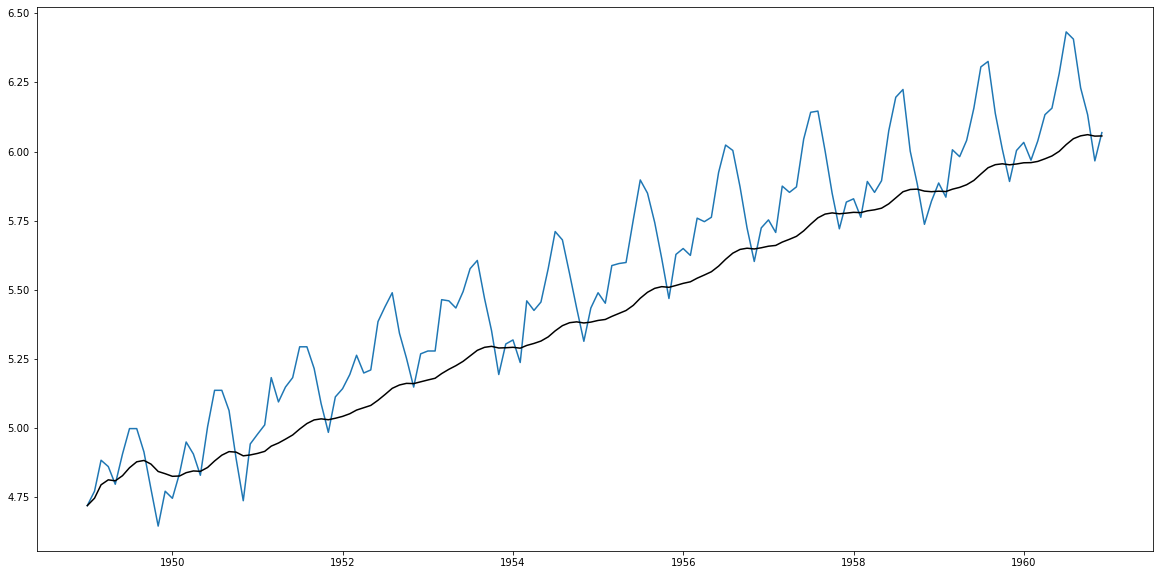

In [ ]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() #EWM gives more weight to recent observations or it gives less and less weight to data as they are further removed in time, thus it can capture recent trends more quickly
plt.plot(data_log)
plt.plot(exp_data, color='black')

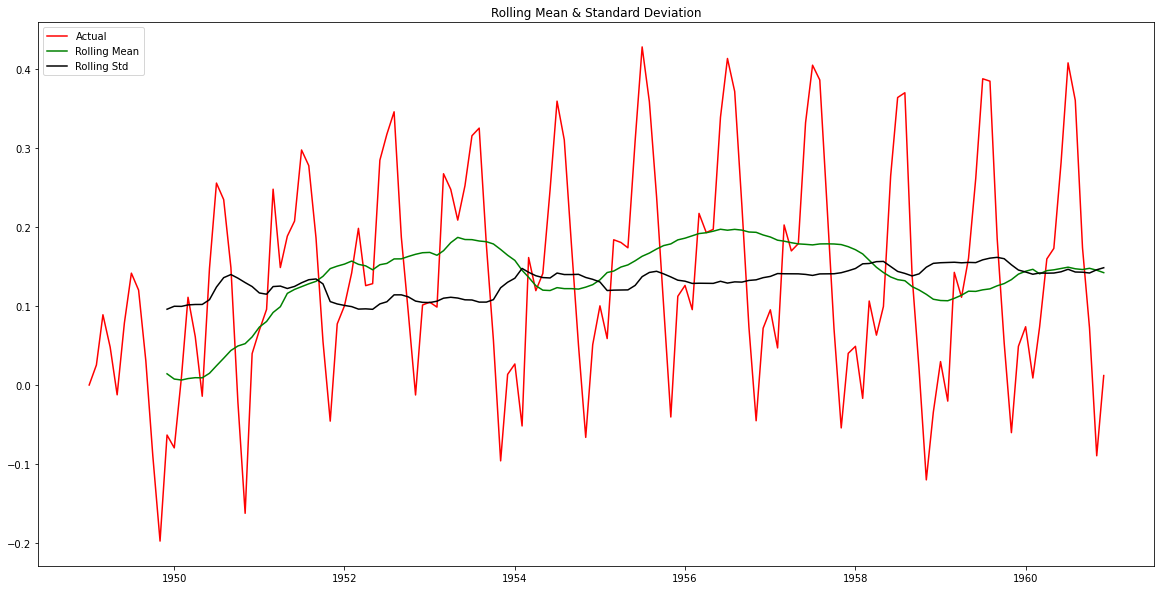

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [ ]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

Sekarang kita melihat dalam Dickey-Fuller test ini nilai t-value (-3.601262) < DF critical value 1% (-3.481682) maka kita menolak null hypothesis, dengan 99% tingkat keyakinan menyatakan bahwa series ini sudah stasioner.

####Stationarity Check - Shift test

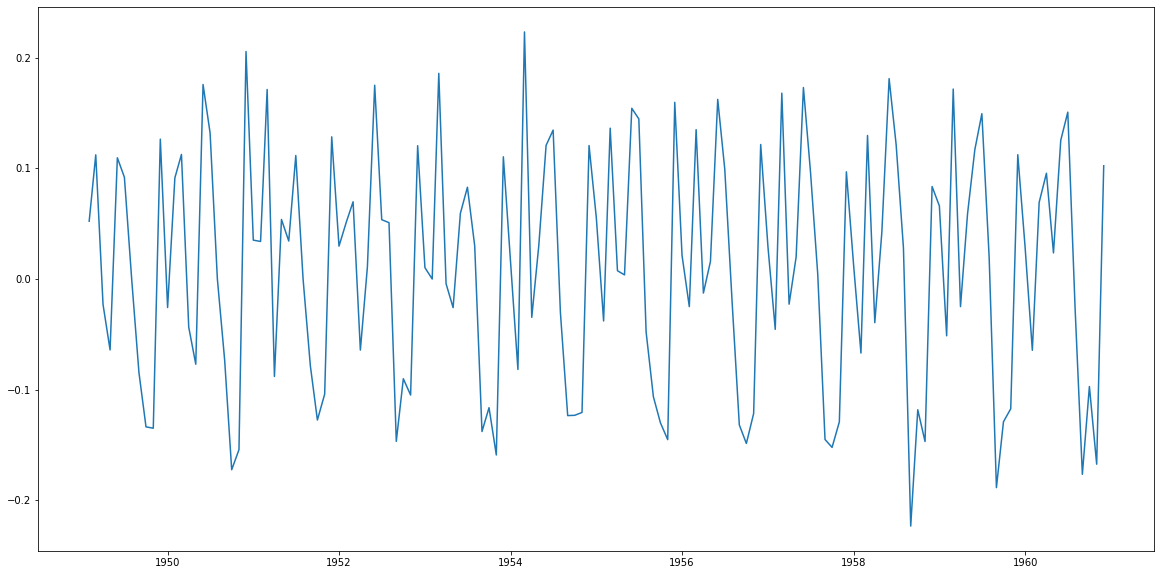

In [ ]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

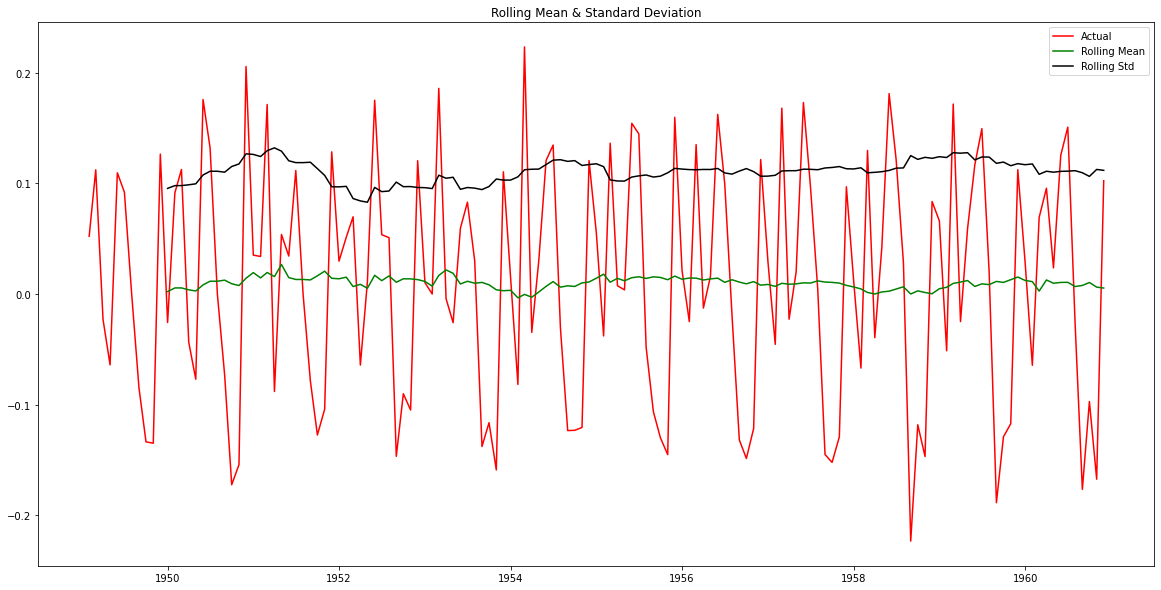

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [ ]:
data_shift=data_shift.dropna()
stationarity(data_shift)

>Dari data shift  diatas, ADF test menunjukkan p-value > 0.05 sehingga kita gagal untuk menolak null hypothesis. Menunjukkan bahwa series ini tidak stasioner. Test statistic yang lebih besar dari Critical value pd 1% dan 5% juga menunjukkan hal demikian. Sehingga dalam observasi ini kita menyimpulkan bahwa series ini variant to time shift (mengalami perubahan pada pergeseran waktu)

## Forecasting with Python - Part 2

###5. Model Development

>Kita akan membangun model untuk memprediksi data yang ada

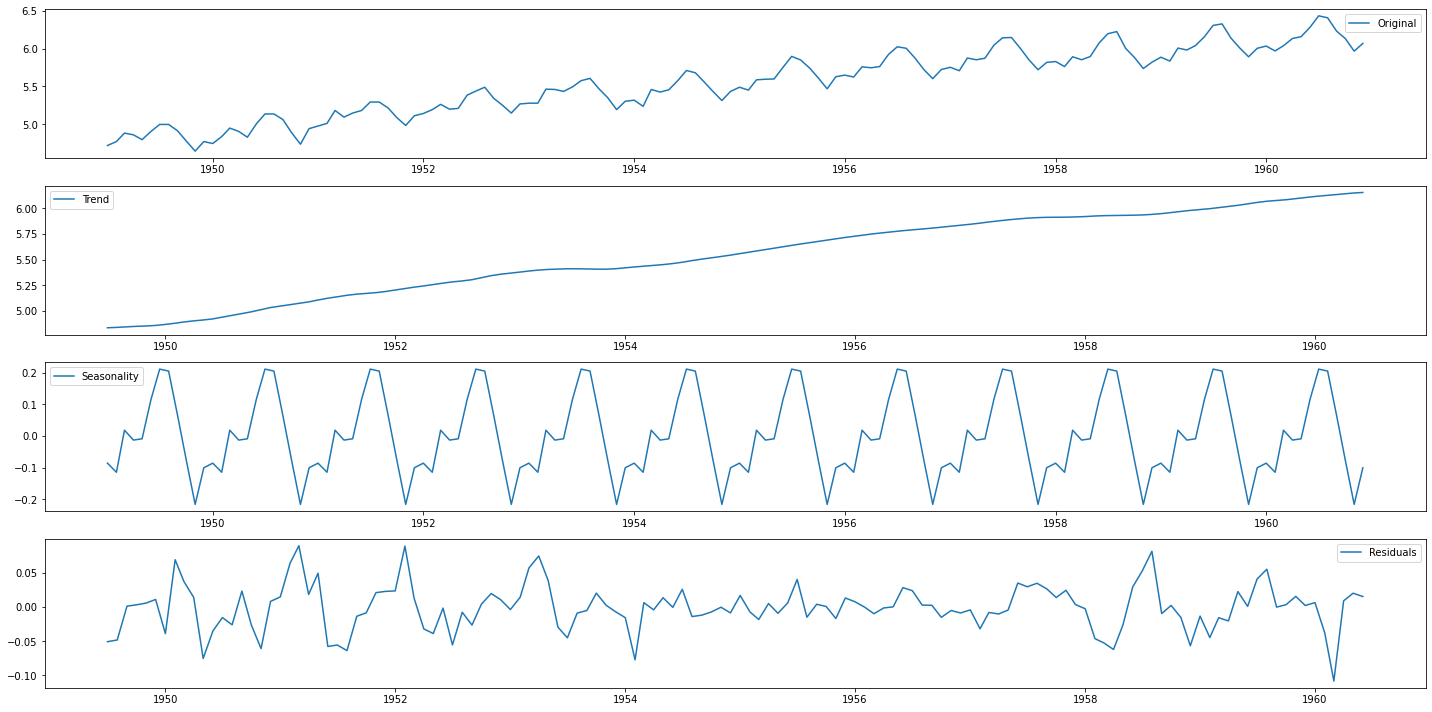

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

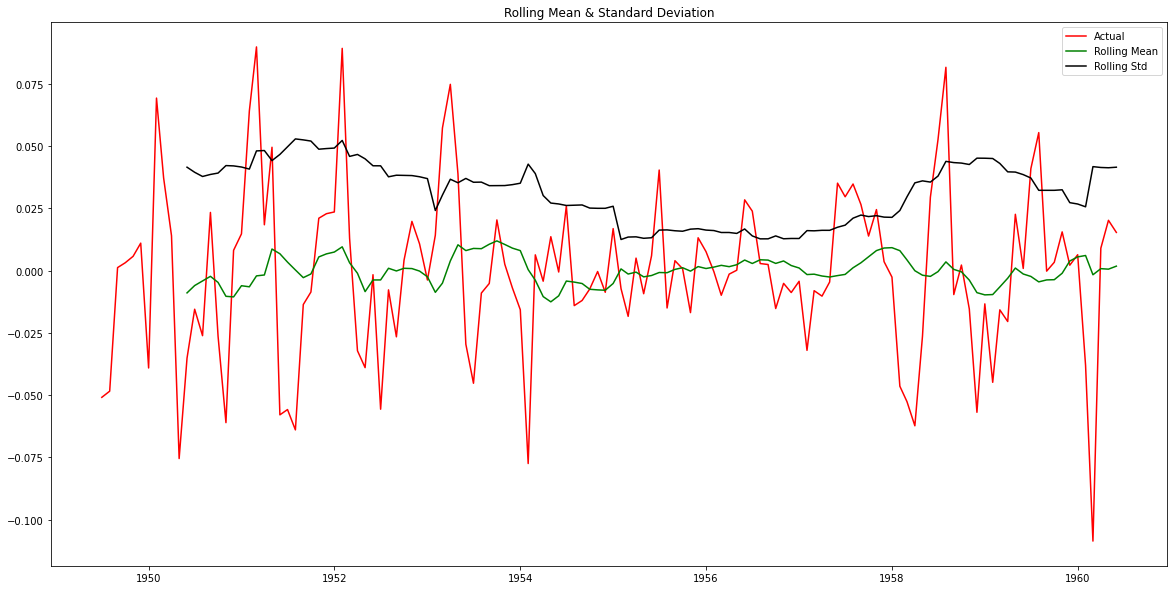

Dickey-Fuller Test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
Lags Used               9.000000e+00
No. of Obs              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [ ]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

>Sekali lagi dlm ADF test ini kita melihat bahwa nilai Test statistic yg jauh lebih kecil daripada critical value pd berbagai tingkat keyakinan. Dan p-value yang jauh lebih kecil dari 0.05, kita dapat menyatakan bahwa series ini cukup kuat stasioner.

Text(0.5, 1.0, 'Autocorrelation Function')

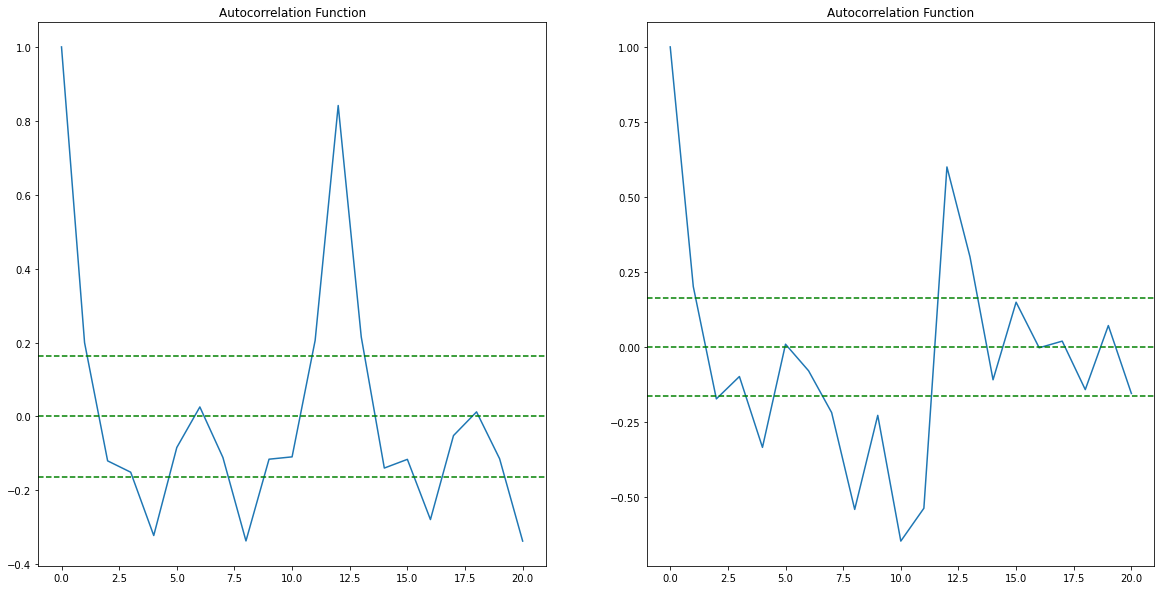

In [ ]:
from statsmodels.tsa.stattools import acf, pacf #dari library statsmodel time series analysis kita akan melakukan import module auto correlation function dan partial auto correlation function

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

Cara lain untuk melakukan tes stasioner adalah dengan menggunakan autocorrelation function (ACF). Fungsi ini akan mem plot korelasi antara series dan lag series tsb dengan 95% tingkat keyakinan ditandai dengan garis hijau putus-putus. Jika autocorellation memotong garis putus-putus tersebut dapat diartikan bahwa specific lag tsb berkorelasi secara signifikan dengan series yang ada. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ARIMA model


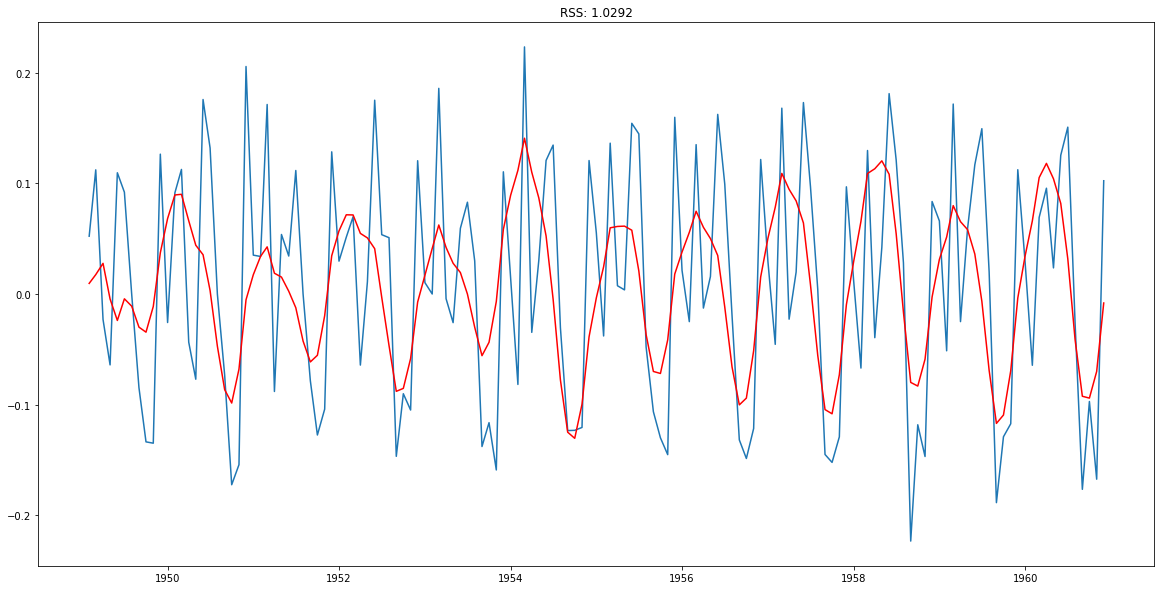

In [ ]:
from statsmodels.tsa.arima_model import ARIMA #dari library statsmodel time series analysis kita akan melakukan import module Autoregressive integrated moving average

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['#Passengers'])**2))
print('plotting ARIMA model')

###6. Model Validation

>Sekarang kita akan melakukan validasi terhadap model yang telah kita buat

In [ ]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [ ]:
predictions_cum_sum=predictions.cumsum() #melakukan perhitungan cumulative sum
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [ ]:
predictions_log=pd.Series(data_log['#Passengers'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

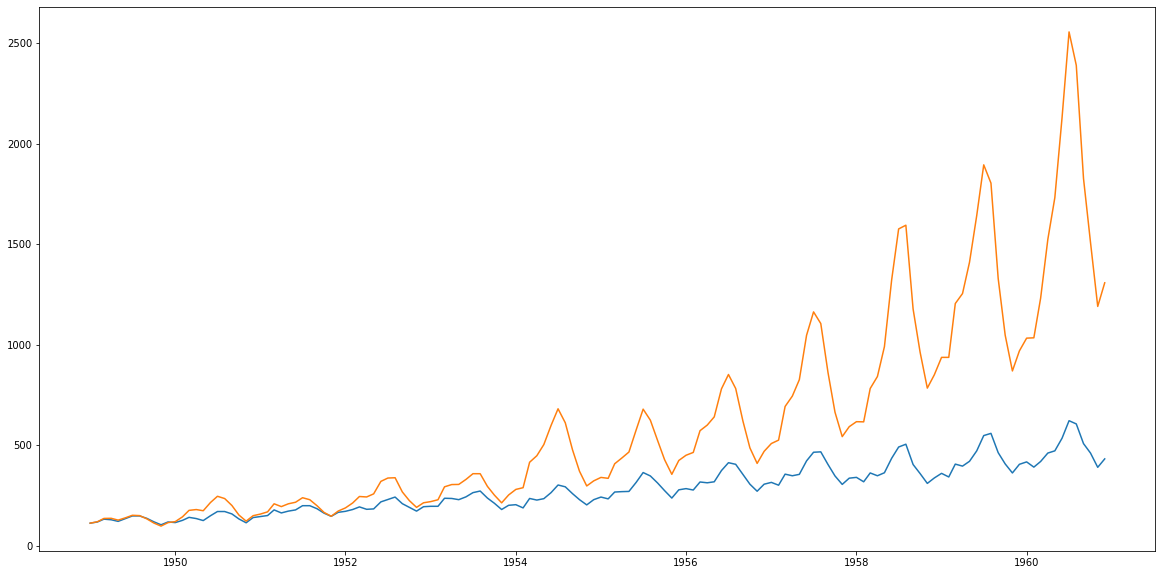

In [ ]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

###7. Plot forecast with Confidence band

>Visualisasi nilai prediksi beserta interval keyakinan

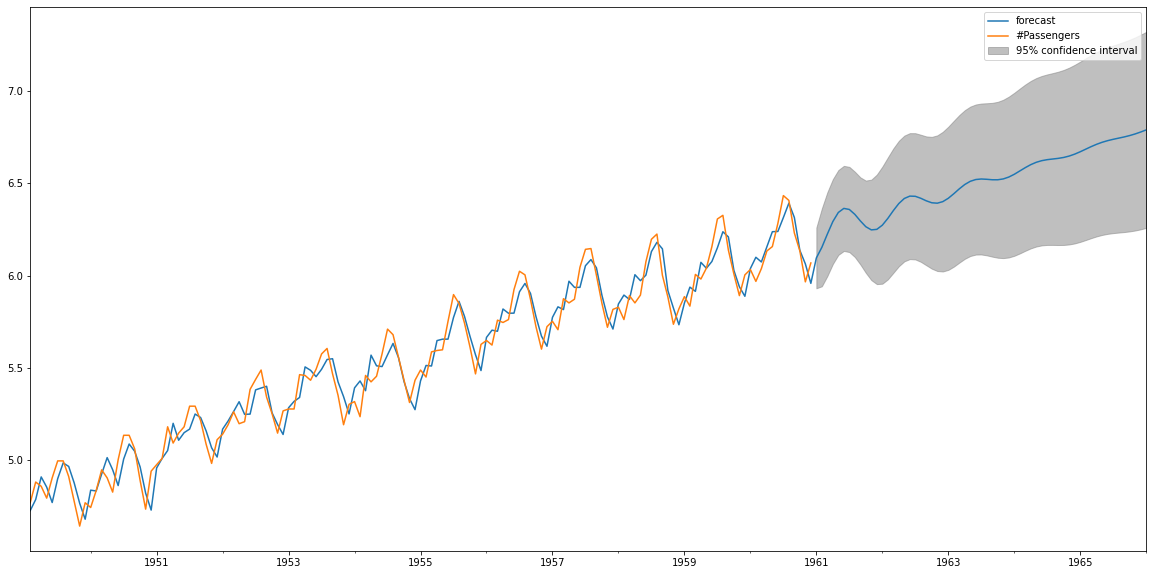

In [ ]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [ ]:
results.forecast(steps=120)

(array([6.09553389, 6.15281393, 6.22442948, 6.29241076, 6.34164688,
        6.36359335, 6.35784666, 6.33139295, 6.29597541, 6.26447722,
        6.24738335, 6.25025176, 6.27275831, 6.30940294, 6.35151464,
        6.38988618, 6.41727342, 6.4301102 , 6.42906664, 6.41842474,
        6.4045615 , 6.39403616, 6.39183083, 6.40019498, 6.41833678,
        6.44295382, 6.46937401, 6.49293946, 6.51024079, 6.51988998,
        6.5226755 , 6.52112367, 6.51864513, 6.51853679, 6.52311911,
        6.53322344, 6.54812846, 6.56591526, 6.58410271, 6.60036499,
        6.61313226, 6.62192744, 6.62737757, 6.63093102, 6.63438666,
        6.63937964, 6.64696482, 6.65739815, 6.67015294, 6.68414215,
        6.69806586, 6.71077859, 6.7215769 , 6.73033944, 6.73749774,
        6.74386345, 6.75037292, 6.75782562, 6.7666865 , 6.77699789,
        6.78841281, 6.80032812, 6.81207151, 6.82308715, 6.83307091,
        6.84202449, 6.85022271, 6.85811181, 6.86617301, 6.87479112,
        6.88416263, 6.89426342, 6.90487845, 6.91